# Inspecting embeddings vectors by means of PCA

In [12]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from ast import literal_eval

In [13]:
data = pd.read_csv('train_data-CLEANED-7.csv', sep = ';', converters={"embeddings_uncsd-BERT": literal_eval, "embeddings_csd-BERT": literal_eval, "embeddings_USE": literal_eval, "embeddings_MiniLM-6": literal_eval, "embeddings_MiniLM-12": literal_eval, "embeddings_Doc2Vec-enwiki": literal_eval, "embeddings_Doc2Vec-apnews": literal_eval, "embeddings_IS-GloVe": literal_eval, "embeddings_IS-FastText": literal_eval, "embeddings_uncsd-BERT-1024": literal_eval}, dtype={'affil_index': 'int32'})
data.drop(columns = ['Unnamed: 0'], inplace = True)
data

part       labels  affil_index  \
0     Department of Infectious Diseases         None            0   
1                    Molecular Virology         None            0   
2                Heidelberg University   Institution            0   
3               Im Neuenheimer Feld 345         None            0   
4                      69120 Heidelberg         City            0   
...                                 ...          ...          ...   
2992                             India.      Country          600   
2993         caprotec bioanalytics GmbH  Institution          601   
2994                    Volmerstrasse 5         None          601   
2995                       12489 Berlin         City          601   
2996                           Germany.      Country          601   

                                    embeddings_csd-BERT  \
0     [-0.7451534271240234, 0.47369468212127686, 0.9...   
1     [-0.7110623717308044, 0.4193134307861328, 0.99...   
2     [-0.7138798236846924, 0.3940200209617615, 0.99...   
3     [-0.7371072769165039, 0.4671095013618469, 0.99...   
4     [-0.6838078498840332, 0.43467605113983154, 0.9...   
...                                                 ...   
2992  [-0.8424339890480042, 0.6388465166091919, 0.99...   
2993  [-0.8602685928344727, 0.610092043876648, 0.999...   
2994  [-0.7102148532867432, 0.5200476050376892, 0.99...   
2995  [-0.7458048462867737, 0.5328115820884705, 0.99...   
2996  [-0.7979846000671387, 0.5943405628204346, 0.99...   

                                  embeddings_uncsd-BERT  \
0     [-0.9760083556175232, -0.6990846991539001, -0....   
1     [-0.9385858774185181, -0.5305934548377991, -0....   
2     [-0.8486786484718323, -0.2455383986234665, 0.4...   
3     [-0.8885483145713806, -0.38439667224884033, -0...   
4     [-0.8710287809371948, -0.18979620933532715, 0....   
...                                                 ...   
2992  [-0.9591183066368103, -0.44601452350616455, -0...   
2993  [-0.8730614185333252, -0.4671713709831238, -0....   
2994  [-0.866323709487915, -0.31122225522994995, -0....   
2995  [-0.8497667908668518, -0.27025192975997925, -0...   
2996  [-0.9390044808387756, -0.38498663902282715, -0...   

                             embeddings_uncsd-BERT-1024  \
0     [-0.9936661124229431, -0.9937924742698669, 0.9...   
1     [-0.9353844523429871, -0.8880748748779297, 0.9...   
2     [-0.8594508767127991, -0.8380329608917236, 0.9...   
3     [-0.9990481734275818, -0.983550488948822, 0.99...   
4     [-0.13470880687236786, -0.4623102843761444, -0...   
...                                                 ...   
2992  [-0.9472164511680603, -0.9264965653419495, 0.9...   
2993  [-0.96100914478302, -0.9261451363563538, 0.995...   
2994  [-0.9971734881401062, -0.9898406267166138, 0.9...   
2995  [-0.1760038137435913, -0.6943709254264832, -0....   
2996  [-0.9800318479537964, -0.9295092225074768, 0.9...   

                              embeddings_Doc2Vec-enwiki  \
0     [-0.0006624317611567676, -0.000624399748630821...   
1     [-0.0014015781925991178, -0.001260015065781772...   
2     [-0.0006516524590551853, -0.001572769018821418...   
3     [0.001873101806268096, -0.01634991355240345, -...   
4     [0.0016177125507965684, 0.000449529878096655, ...   
...                                                 ...   
2992  [-0.0007508505368605256, -0.000230572666623629...   
2993  [-0.0016056945314630866, 0.0005506016314029694...   
2994  [0.039081644266843796, -0.03451055660843849, -...   
2995  [-0.001003924640826881, 0.00045013363705947995...   
2996  [0.0010621276451274753, 0.0005723817739635706,...   

                              embeddings_Doc2Vec-apnews  \
0     [-0.0006624317611567676, -0.000624399748630821...   
1     [-0.0014015781925991178, -0.001260015065781772...   
2     [-0.0006516524590551853, -0.001572769018821418...   
3     [-0.01626664213836193, -0.11745397746562958, -...   
4     [0.0016177125507965684, 0.000449529878096655, ...   
...             

In [14]:
X_list_names = data.columns[3:].to_list()
print(X_list_names)
X_list = []
for name in X_list_names:
    lst = data.loc[:, name].to_list()
    X_list.append(lst)

['embeddings_csd-BERT', 'embeddings_uncsd-BERT', 'embeddings_uncsd-BERT-1024', 'embeddings_Doc2Vec-enwiki', 'embeddings_Doc2Vec-apnews', 'embeddings_IS-GloVe', 'embeddings_IS-FastText', 'embeddings_USE', 'embeddings_MiniLM-6', 'embeddings_MiniLM-12']


In [15]:
y = np.array(data['labels'])

In [16]:
# Perform PCA to reduce the dimensionality to 3 components
pca_results = []
pcas = []
for X in X_list:
    pca = PCA(n_components=3)
    pca_results.append(pca.fit_transform(X))
    pcas.append(pca)

[0.62015319 0.10656299 0.0537726 ]


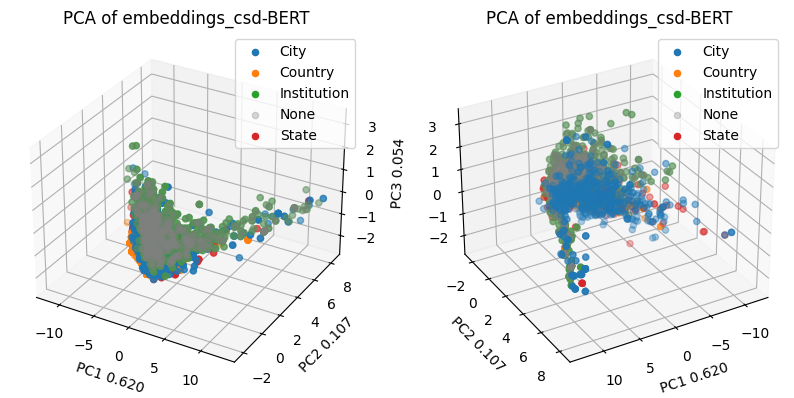

[0.74707931 0.07223922 0.0346465 ]


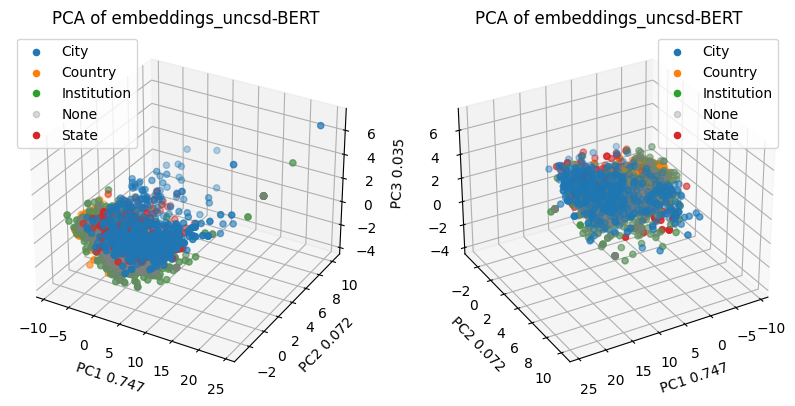

[0.41083848 0.2321331  0.10851585]


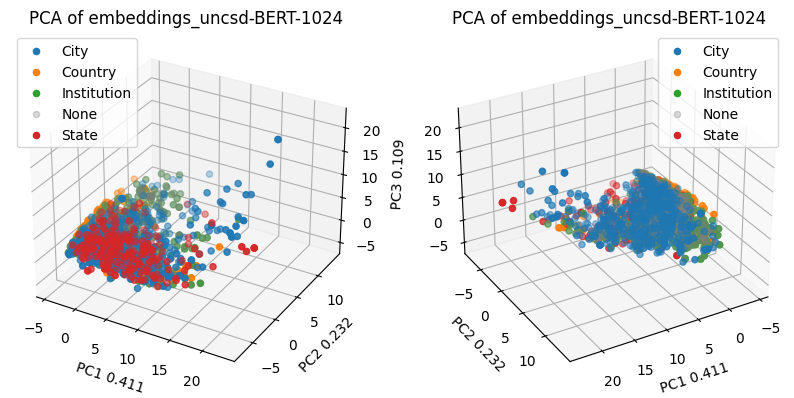

[0.5914636 0.0568015 0.0232973]


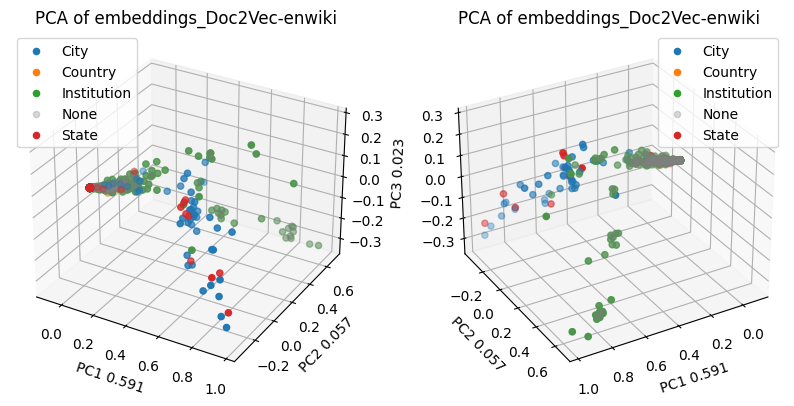

[0.52838563 0.06023883 0.0409232 ]


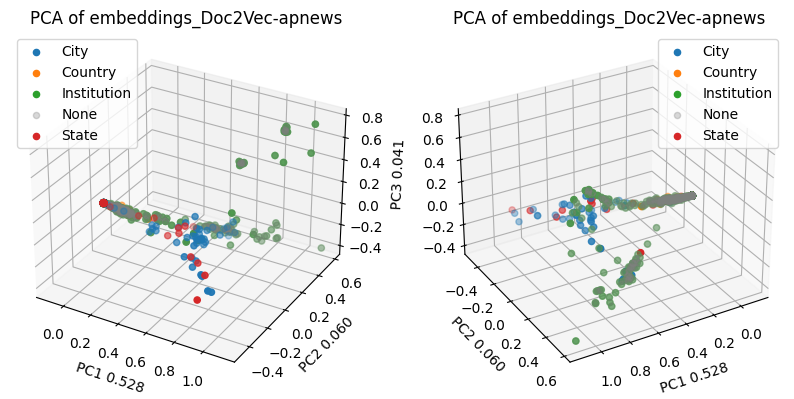

[0.2966061  0.09368772 0.05721192]


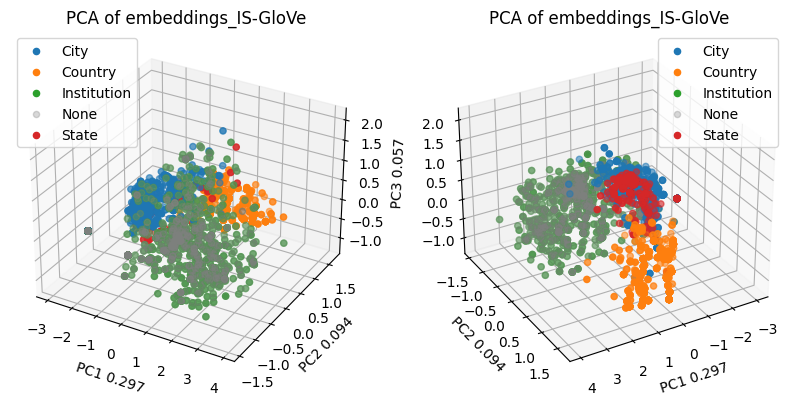

[0.3369112  0.07813738 0.04933747]


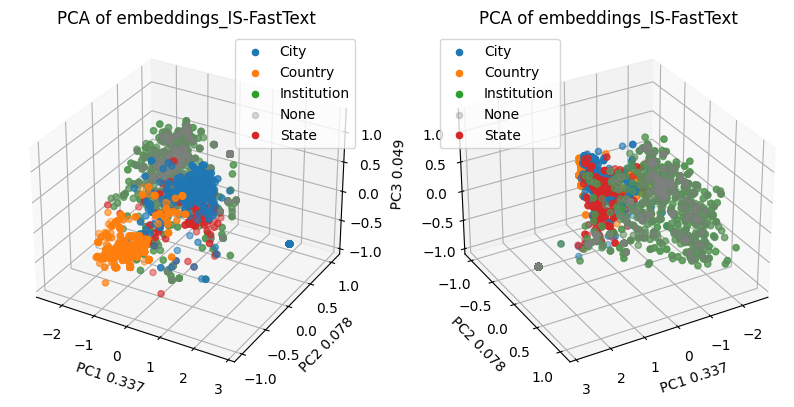

[0.09377006 0.05611825 0.04294635]


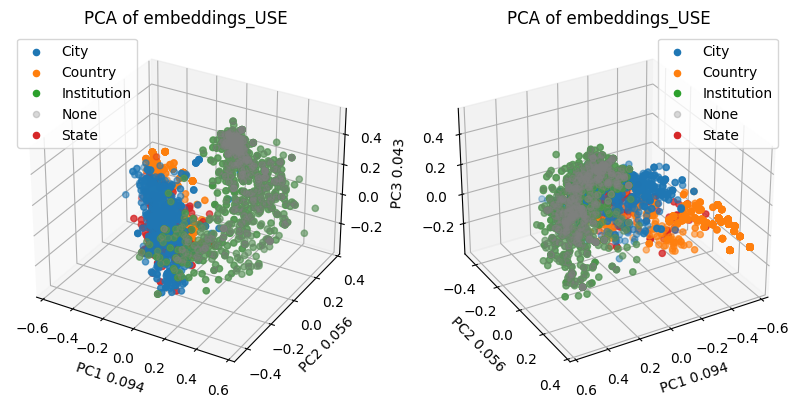

[0.09824948 0.07190981 0.04510993]


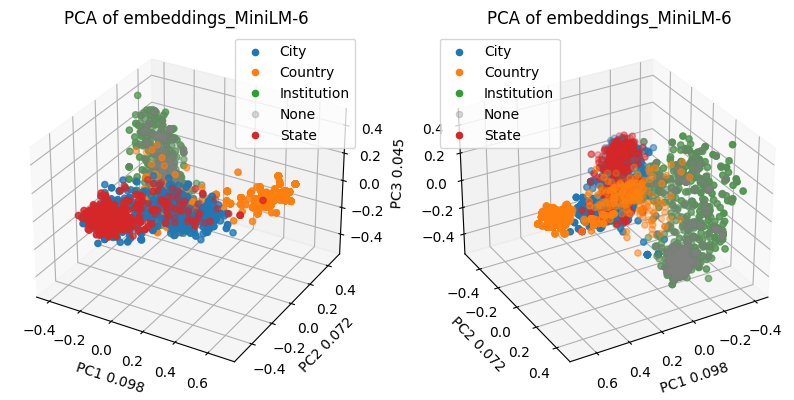

[0.09773236 0.08982504 0.04173286]


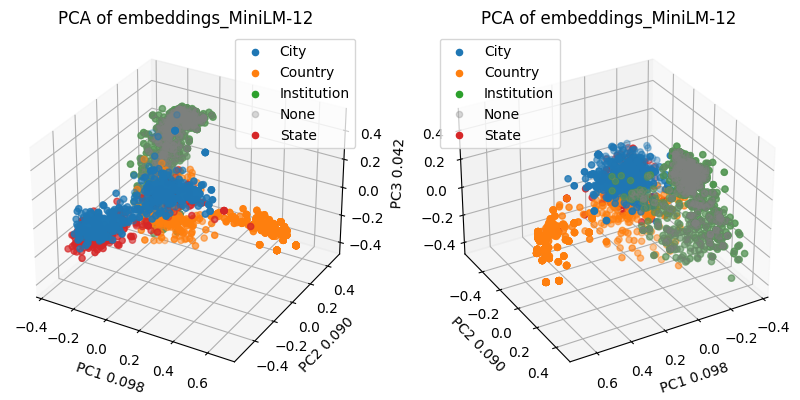

In [17]:
for i, result in enumerate(pca_results):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5), subplot_kw={'projection': '3d'})
    
    ax1 = axes[0]
    for label in np.unique(y):
        if label == 'None':
            ax1.scatter(result[indices, 0],
                       result[indices, 1],
                       result[indices, 2],
                       label=label,
                       alpha = 0.3,
                       color = 'grey')
        else:
            indices = np.where(y == label)
            ax1.scatter(result[indices, 0],
                    result[indices, 1],
                    result[indices, 2], 
                    label=label)
    print(pcas[i].explained_variance_ratio_)
    ax1.set_xlabel('PC1 %.3f' %round(pcas[i].explained_variance_ratio_[0], 3))
    ax1.set_ylabel('PC2 %.3f' %round(pcas[i].explained_variance_ratio_[1], 3))
    ax1.set_zlabel(' PC3 %.3f' %round(pcas[i].explained_variance_ratio_[2], 3))
    ax1.legend()
    ax1.set_title('PCA of ' + X_list_names[i])
    ax1.view_init(elev=30, azim=-60)

    ax2 = axes[1]
    for label in np.unique(y):
        if label == 'None':
            ax2.scatter(result[indices, 0],
                       result[indices, 1],
                       result[indices, 2],
                       label=label,
                       alpha = 0.3,
                       color = 'grey')
        else:
            indices = np.where(y == label)
            ax2.scatter(result[indices, 0],
                    result[indices, 1],
                    result[indices, 2], 
                    label=label)
    ax2.set_xlabel('PC1 %.3f' %round(pcas[i].explained_variance_ratio_[0], 3))
    ax2.set_ylabel('PC2 %.3f' %round(pcas[i].explained_variance_ratio_[1], 3))
    ax2.set_zlabel('')
    ax2.legend()
    ax2.set_title('PCA of ' + X_list_names[i])
    ax2.view_init(elev=30, azim=60)

    plt.savefig('PCA-3D' + X_list_names[i] + '.png')
    plt.show() 
    

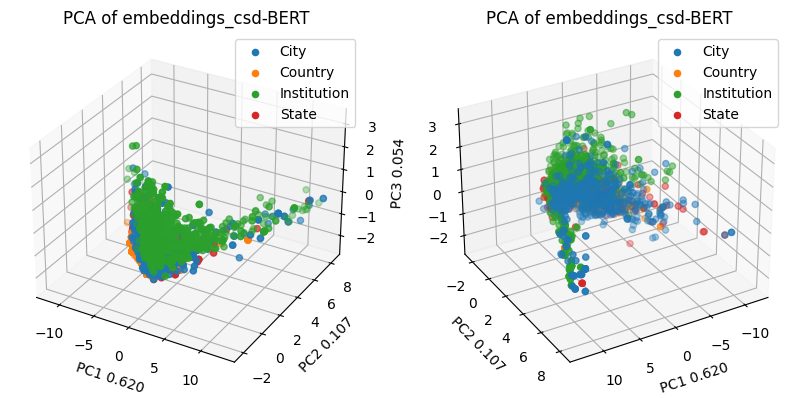

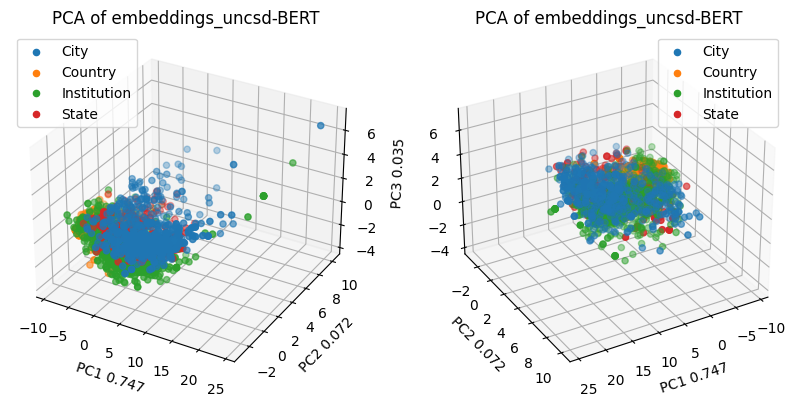

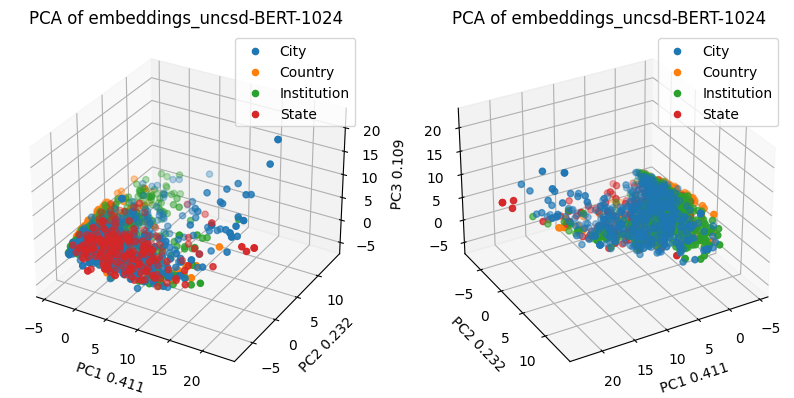

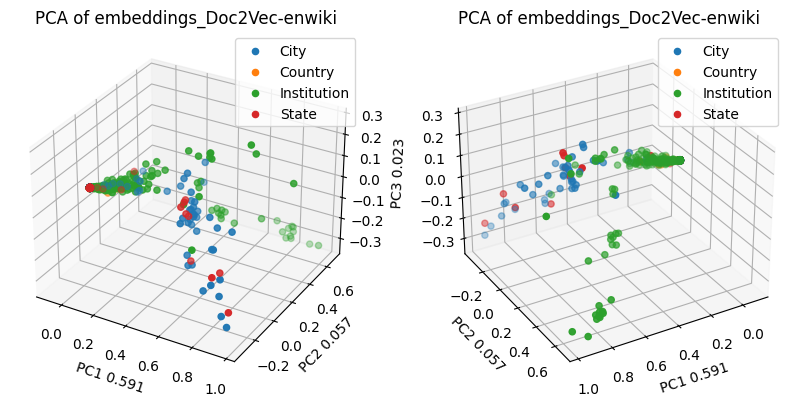

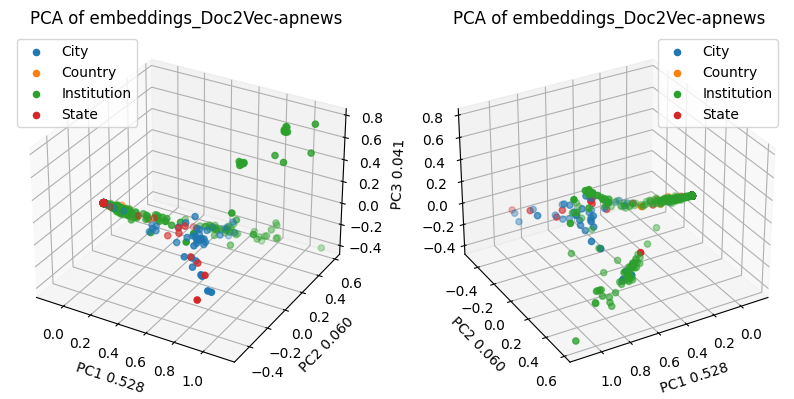

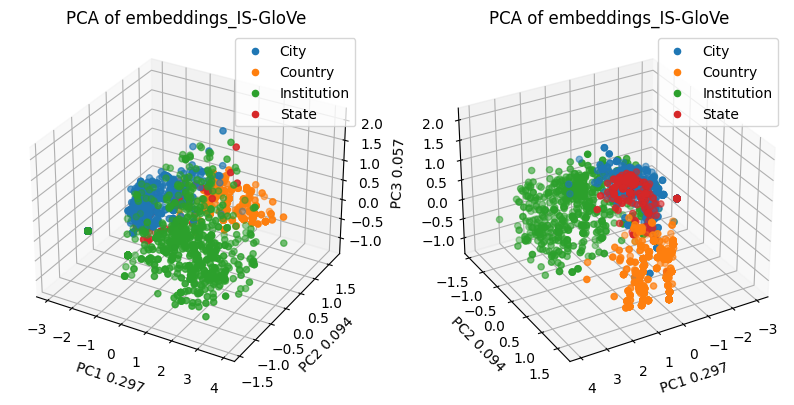

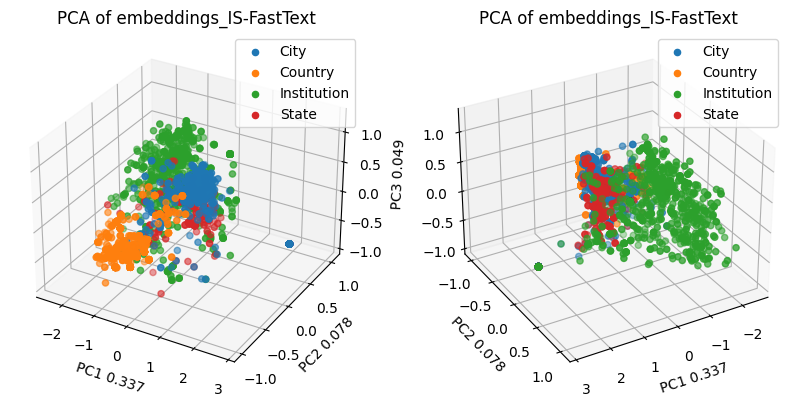

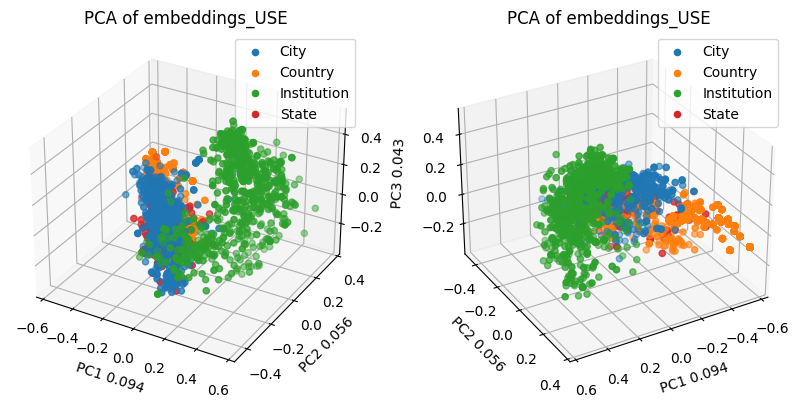

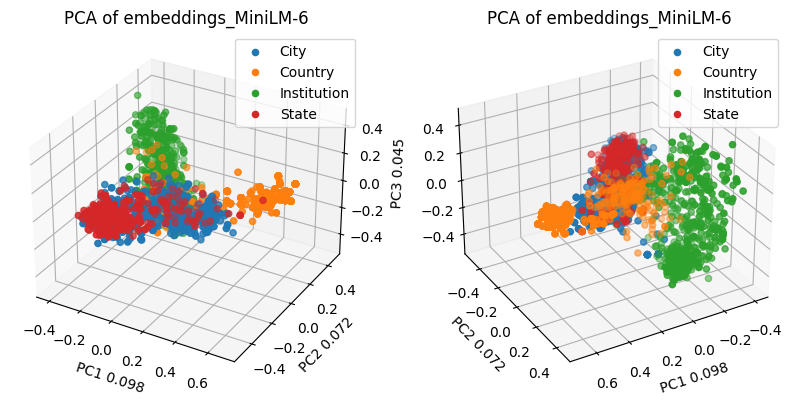

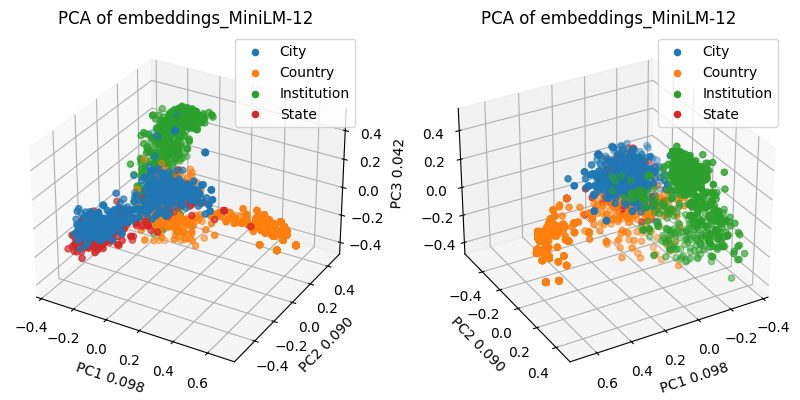

In [18]:
#the same but without None
for i, result in enumerate(pca_results):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5), subplot_kw={'projection': '3d'})
    
    ax1 = axes[0]
    for label in np.unique(y):
        if  label != 'None':
            indices = np.where(y == label)
            ax1.scatter(result[indices, 0],
                    result[indices, 1],
                    result[indices, 2], 
                    label=label)
    ax1.set_xlabel('PC1 %.3f' %round(pcas[i].explained_variance_ratio_[0], 3))
    ax1.set_ylabel('PC2 %.3f' %round(pcas[i].explained_variance_ratio_[1], 3))
    ax1.set_zlabel(' PC3 %.3f' %round(pcas[i].explained_variance_ratio_[2], 3))
    ax1.legend()
    ax1.set_title('PCA of ' + X_list_names[i])
    ax1.view_init(elev=30, azim=-60)

    ax2 = axes[1]
    for label in np.unique(y):
        if  label != 'None':
            indices = np.where(y == label)
            ax2.scatter(result[indices, 0],
                    result[indices, 1],
                    result[indices, 2], 
                    label=label)
    ax2.set_xlabel('PC1 %.3f' %round(pcas[i].explained_variance_ratio_[0], 3))
    ax2.set_ylabel('PC2 %.3f' %round(pcas[i].explained_variance_ratio_[1], 3))
    ax2.set_zlabel('')
    ax2.legend()
    ax2.set_title('PCA of ' + X_list_names[i])
    ax2.view_init(elev=30, azim=60)

    plt.savefig('PCA-3D' + X_list_names[i] + '.png')
    plt.show() 

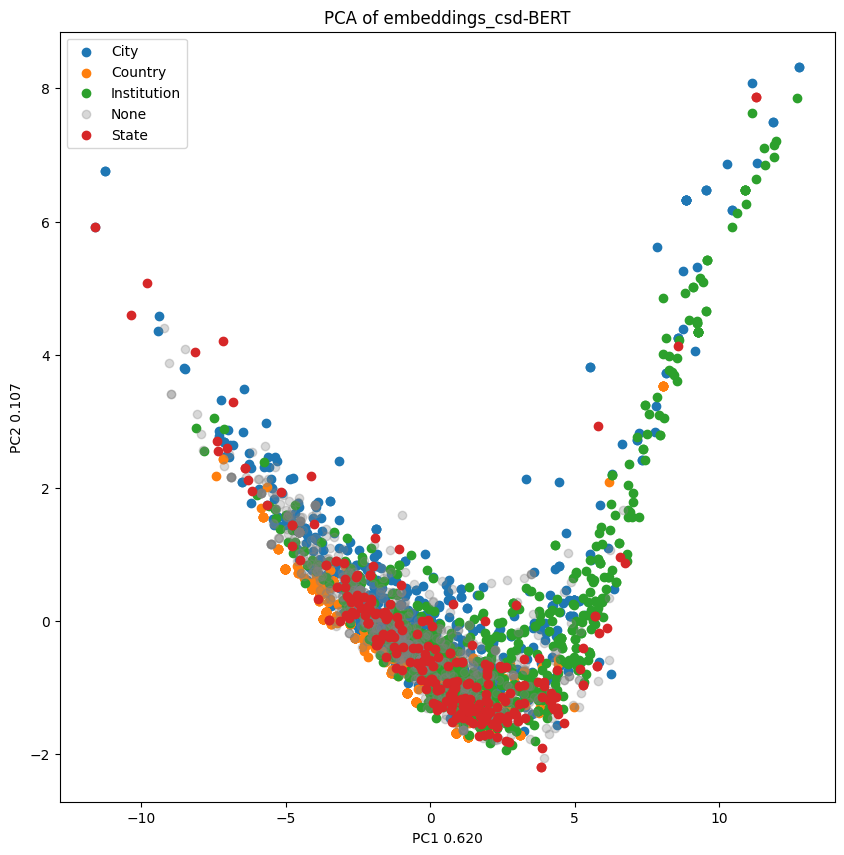

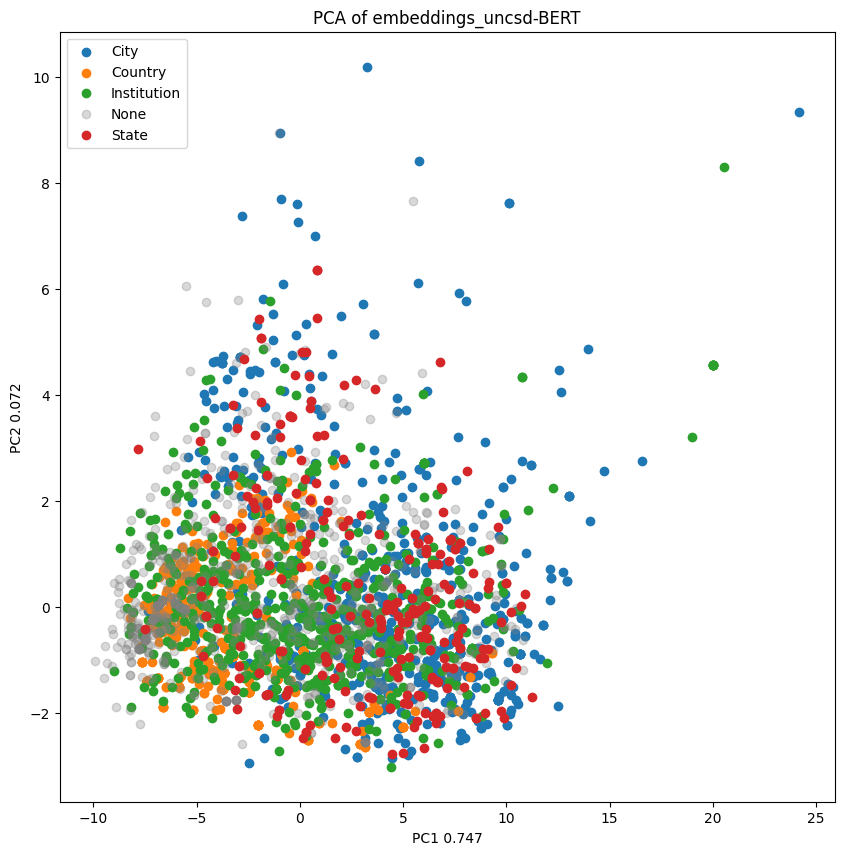

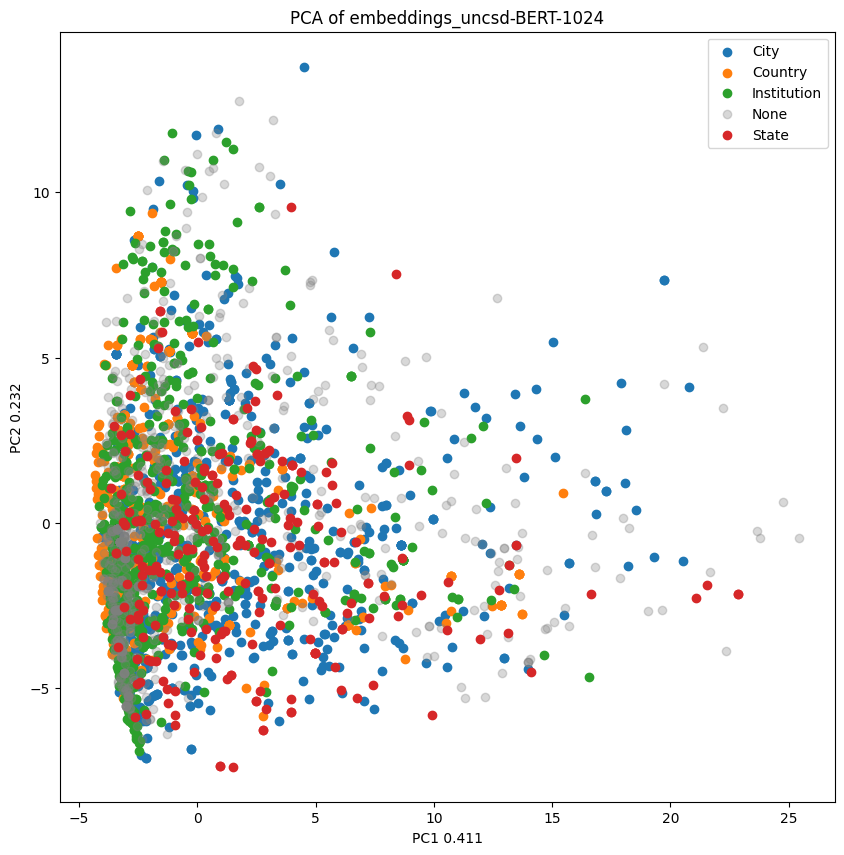

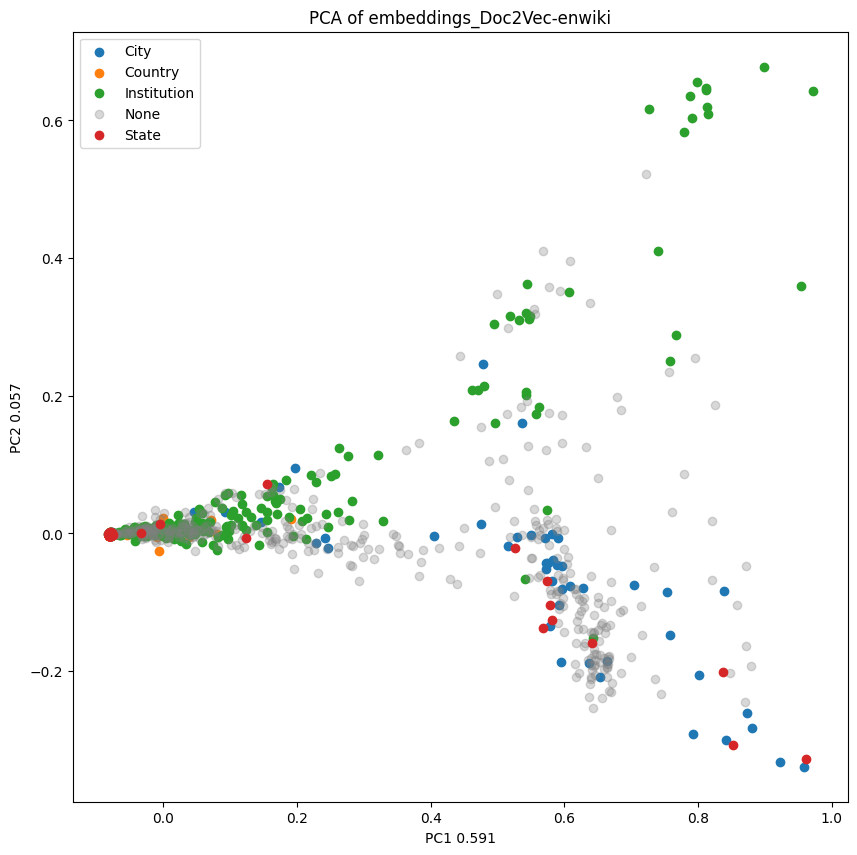

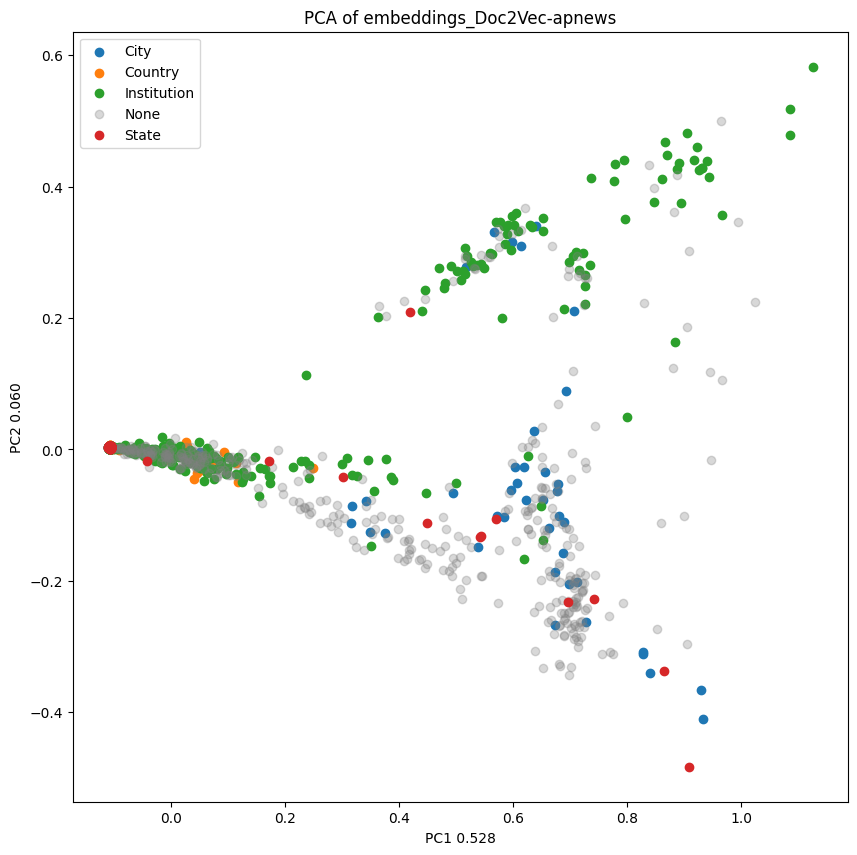

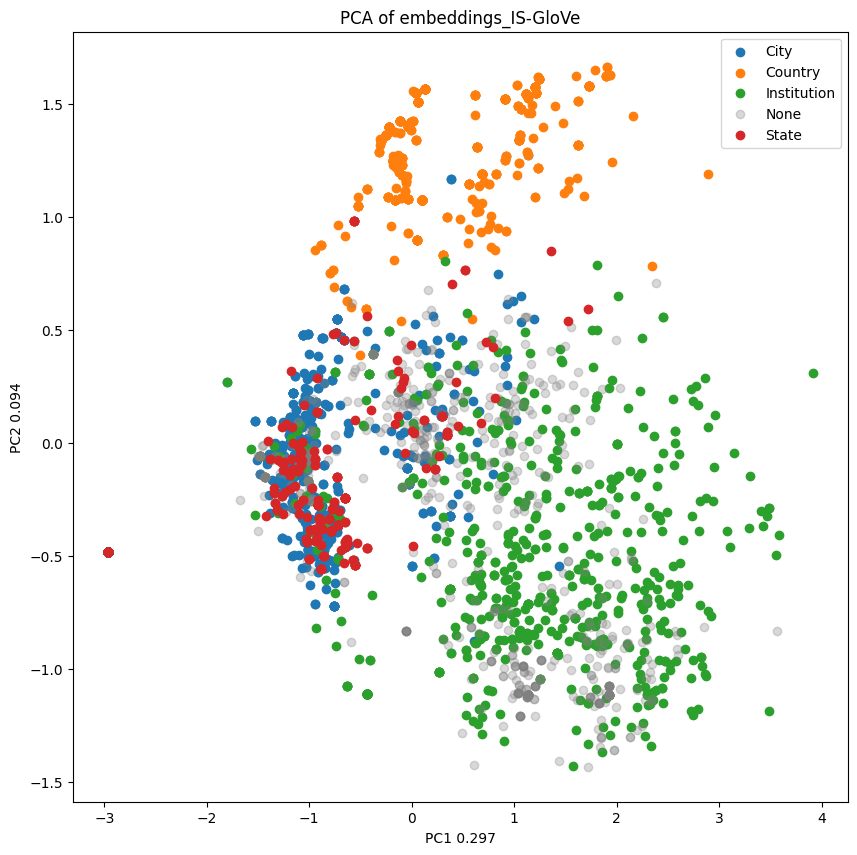

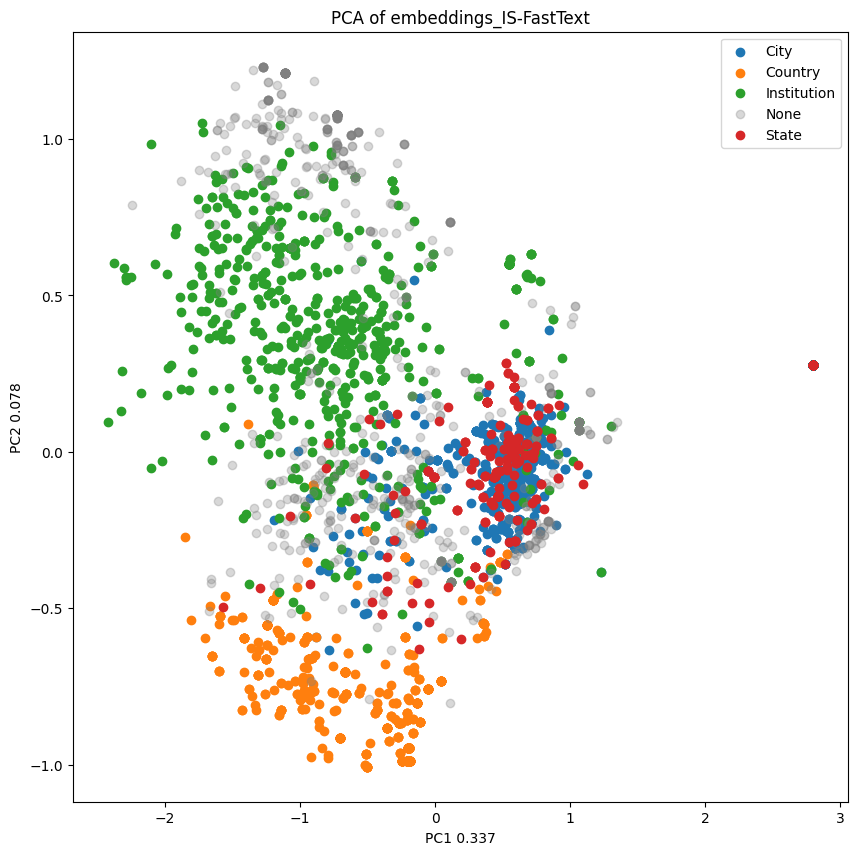

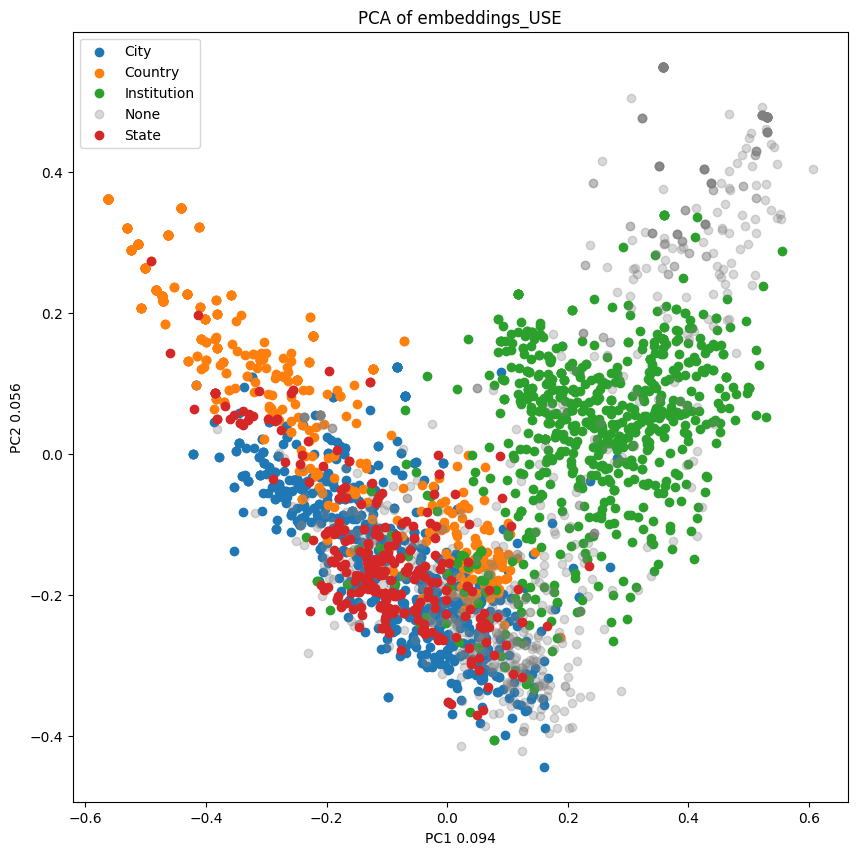

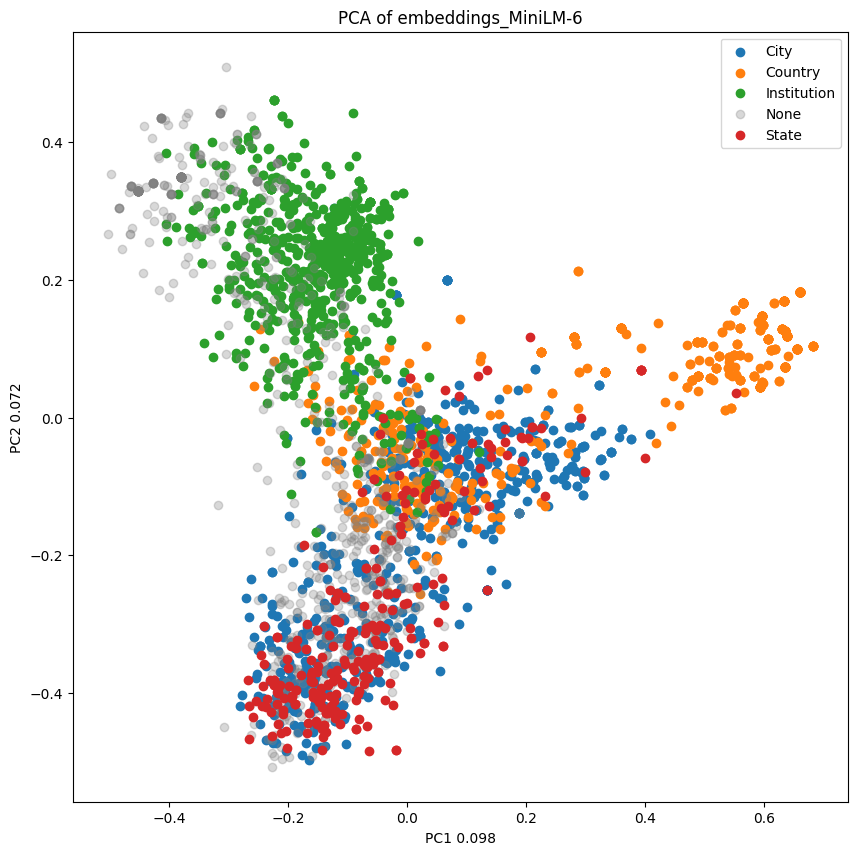

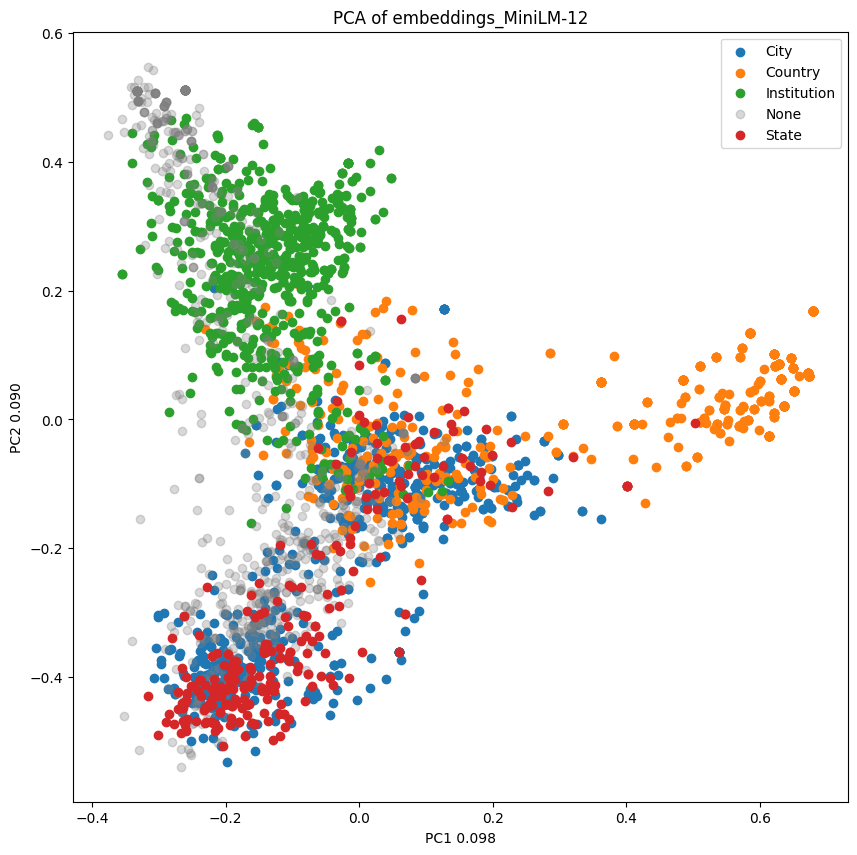

In [21]:
#the same plots but with 2D projection color None transparent grey
for i, result in enumerate(pca_results):
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111)
    for label in np.unique(y):
        indices = np.where(y == label)
        if label == 'None':
            ax.scatter(result[indices, 0],
                       result[indices, 1],
                       label=label,
                       alpha = 0.3,
                       color = 'grey')
        else:
            ax.scatter(result[indices, 0],
                       result[indices, 1],
                       label=label)
    ax.set_xlabel('PC1 %.3f' %round(pcas[i].explained_variance_ratio_[0], 3))
    ax.set_ylabel('PC2 %.3f' %round(pcas[i].explained_variance_ratio_[1], 3))
    ax.legend()
    ax.set_title('PCA of ' + X_list_names[i])
    plt.savefig('PCA-2D' + X_list_names[i] + 'with-None.png')
    plt.show()

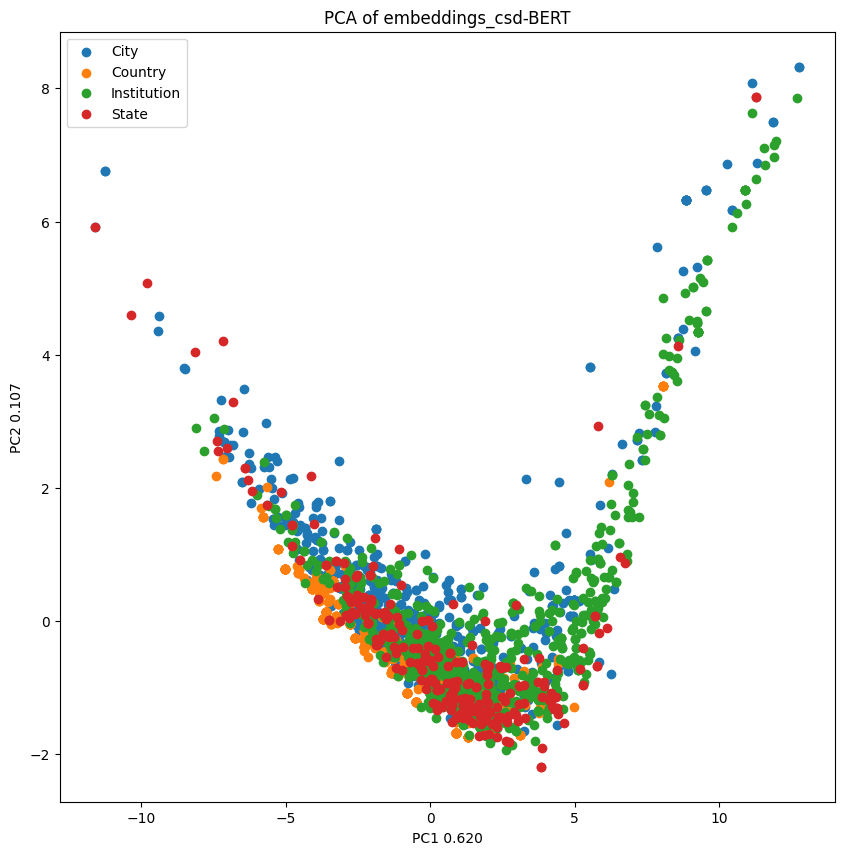

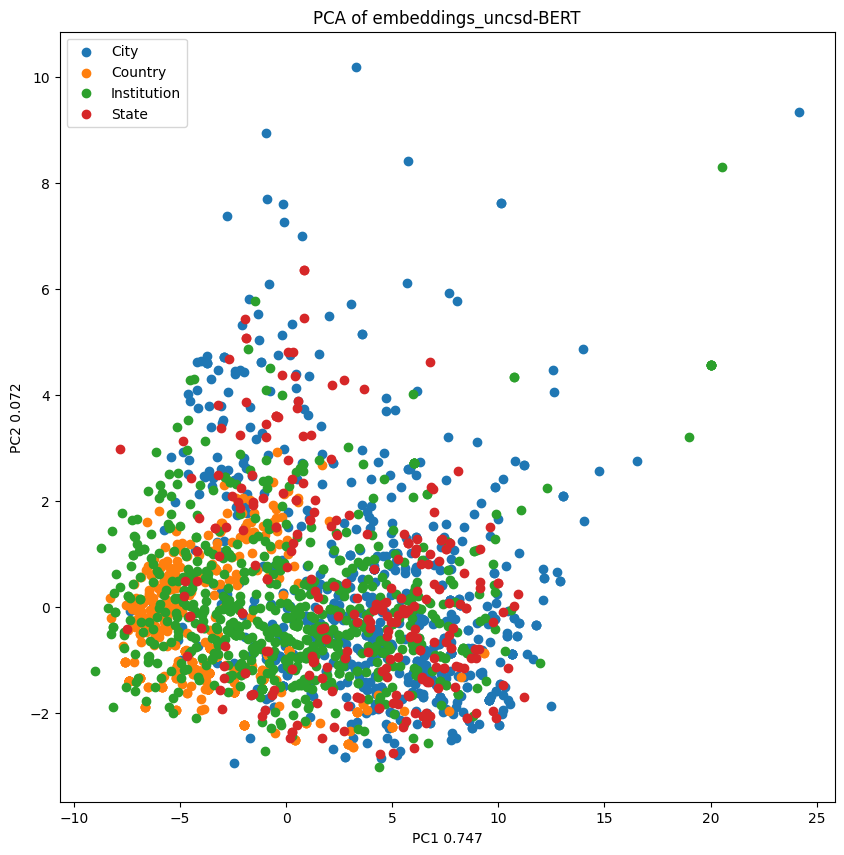

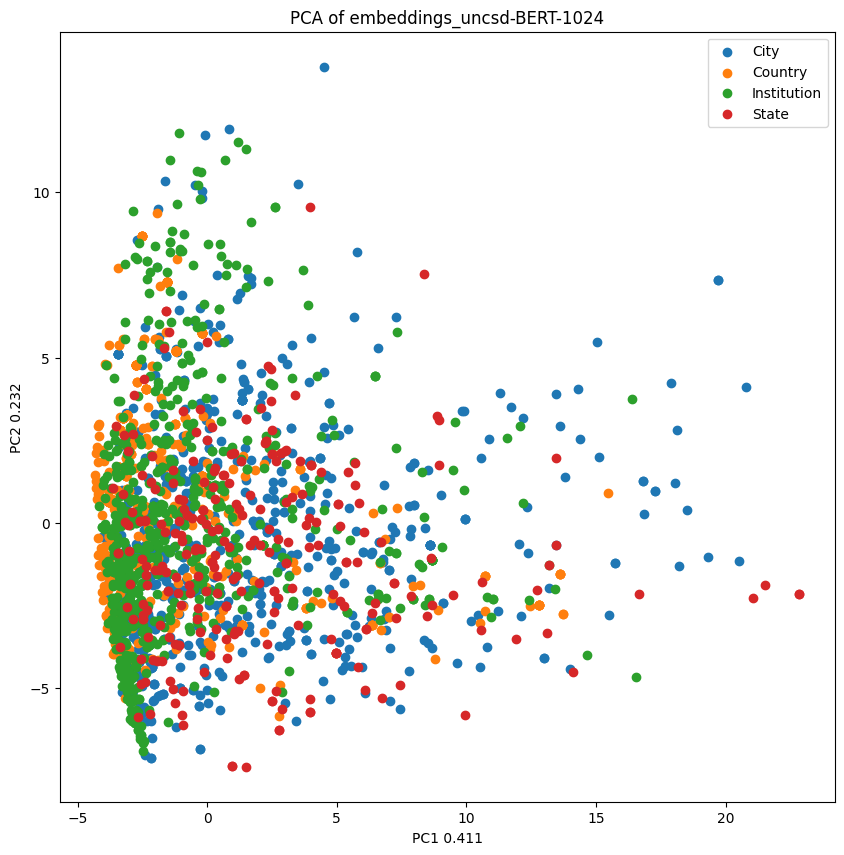

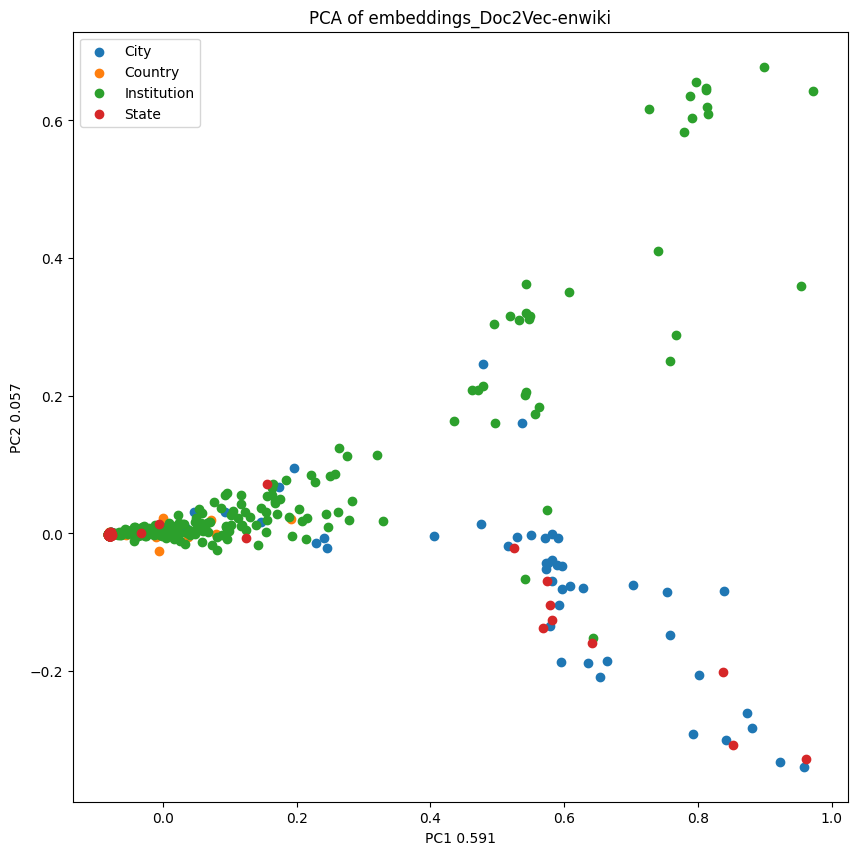

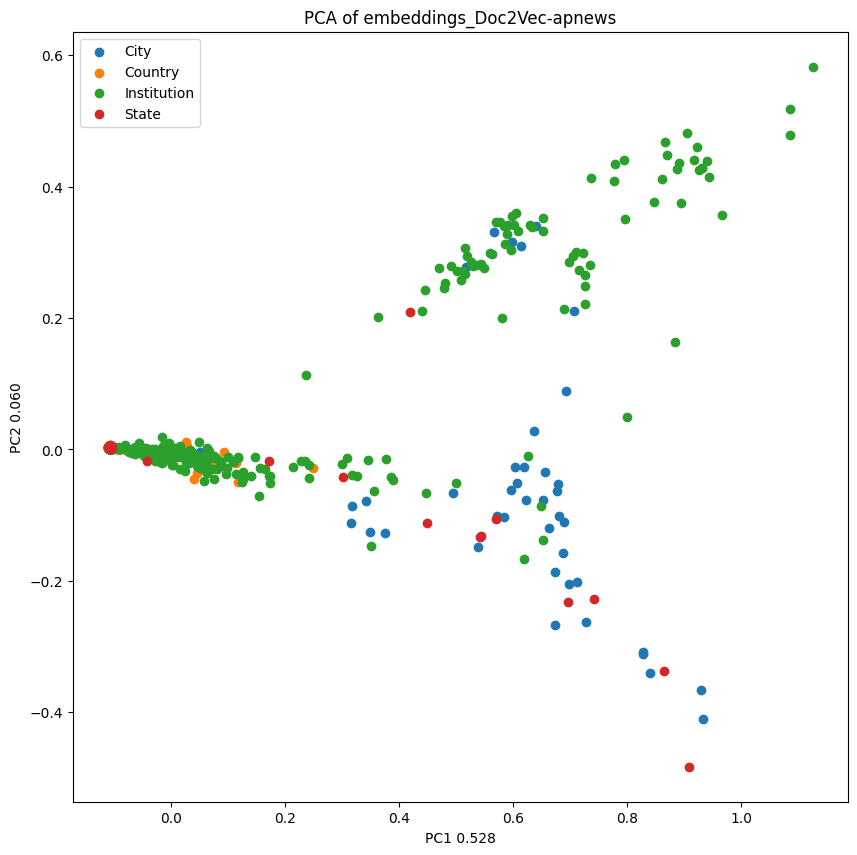

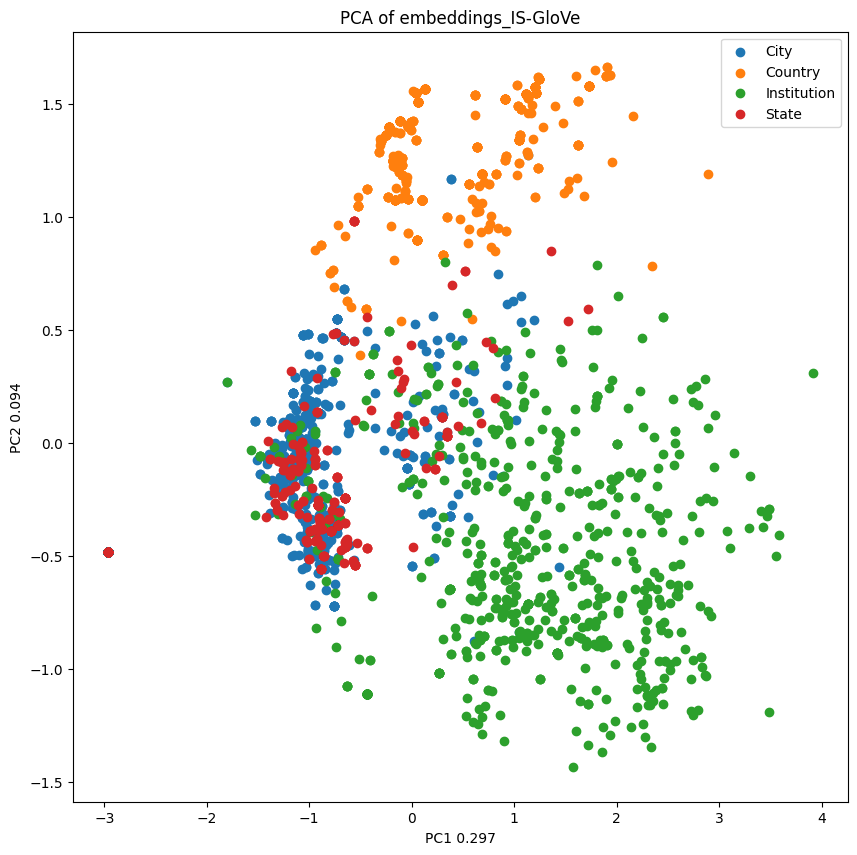

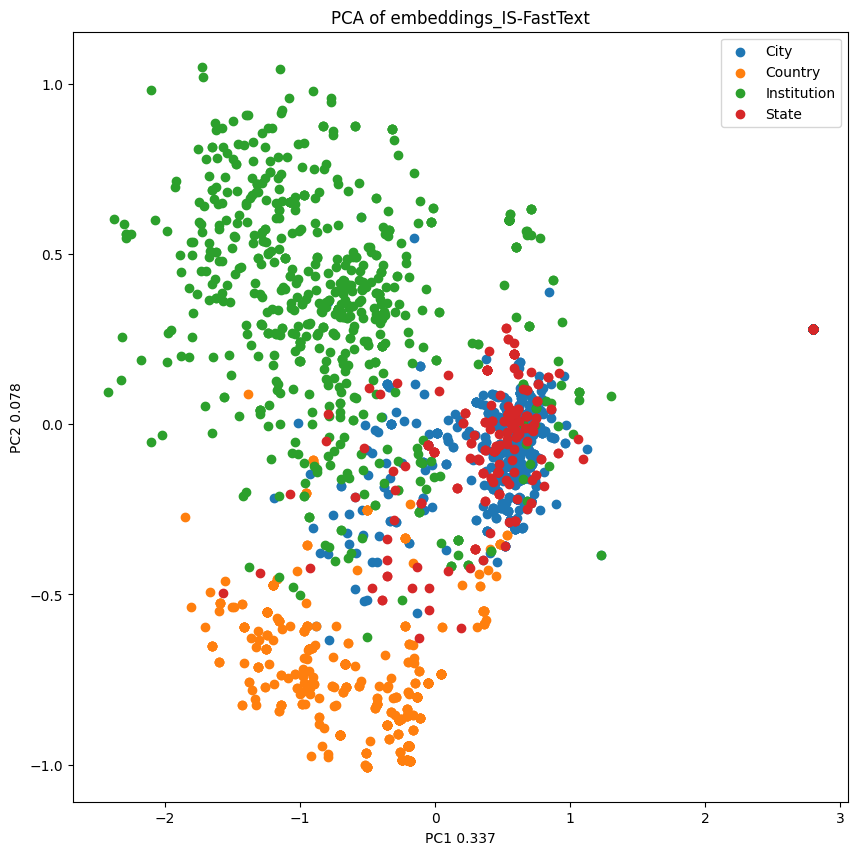

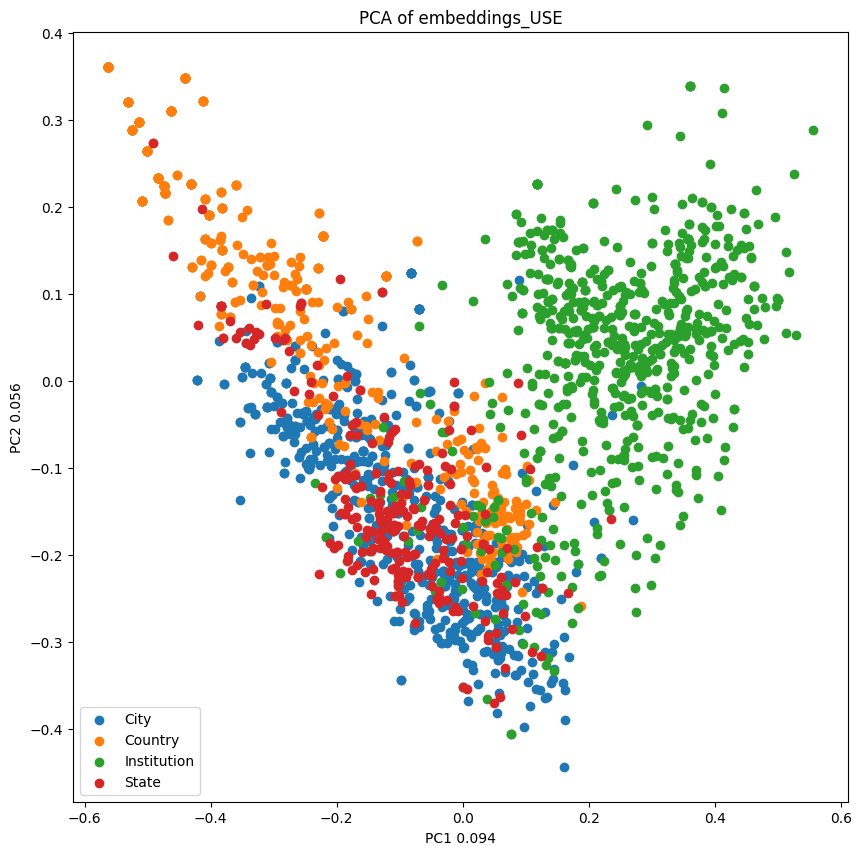

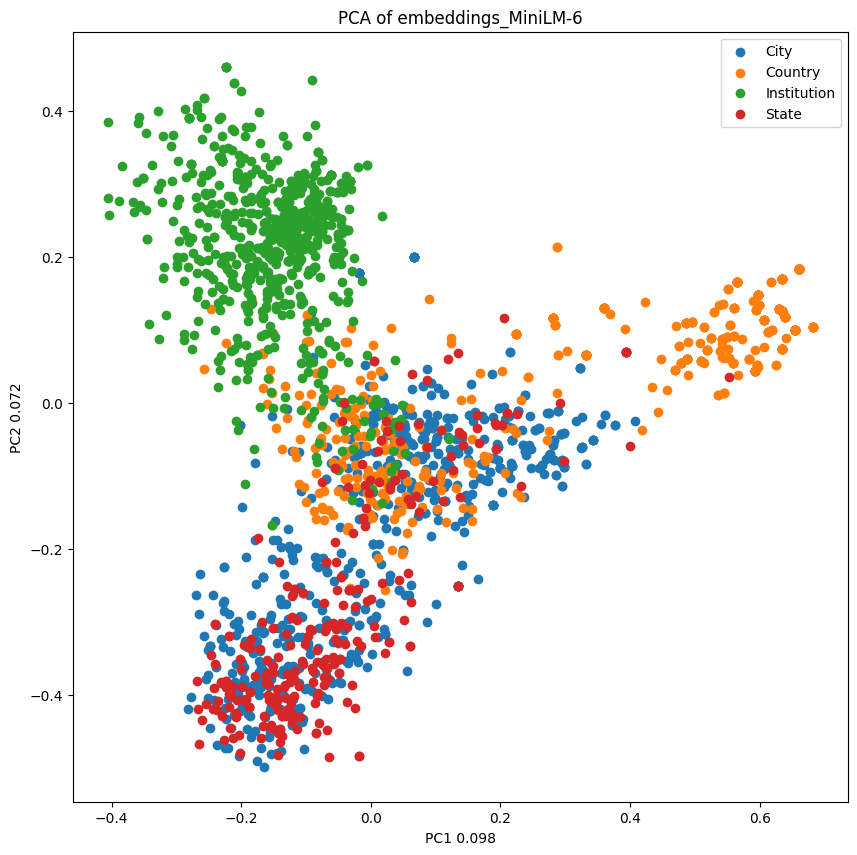

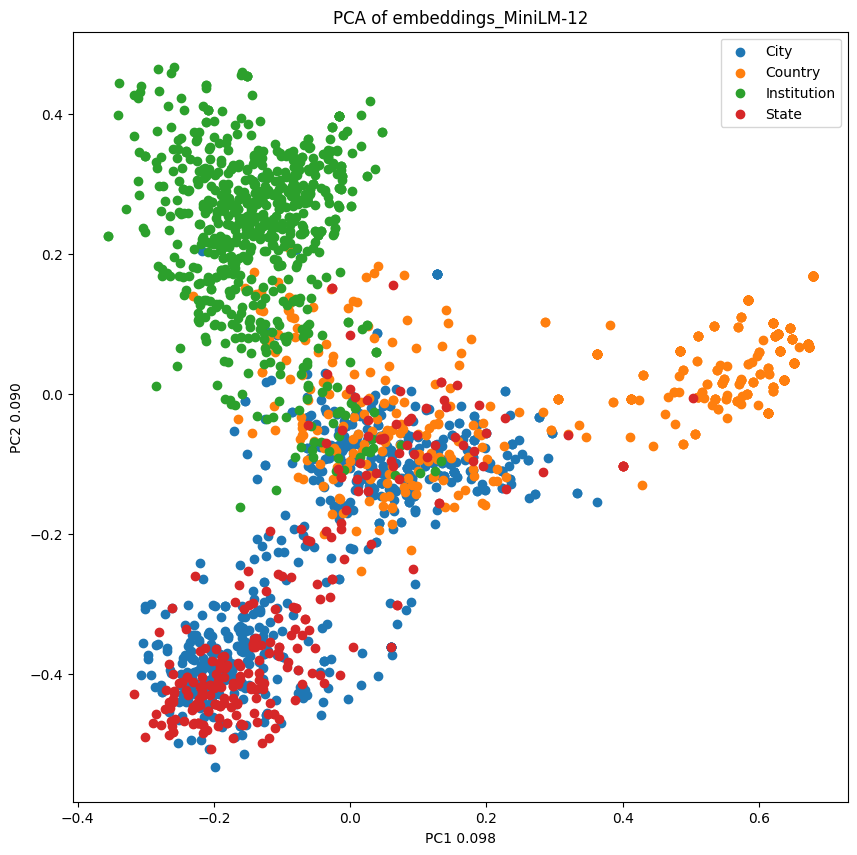

In [22]:
#and again without objects labeled None
for i, result in enumerate(pca_results):
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111)
    for label in np.unique(y):
        if label != 'None':
            indices = np.where(y == label)
            ax.scatter(result[indices, 0],
                       result[indices, 1],
                       label=label)
    ax.set_xlabel('PC1 %.3f' %round(pcas[i].explained_variance_ratio_[0], 3))
    ax.set_ylabel('PC2 %.3f' %round(pcas[i].explained_variance_ratio_[1], 3))
    ax.legend()
    ax.set_title('PCA of ' + X_list_names[i])
    plt.savefig('PCA-2D' + X_list_names[i] + '.png')
    plt.show()